In [2]:
from dish.simulator import Simulator

model = Simulator('gene_expression.xlsx')

def benchmark(iterations: int):
    model.run_simulation('sync', 1, iterations, f'bench-gene-expression-{iterations}.txt', 16, 2)

steps = range(16)
for iterations in [2**s for s in steps]:
    print(f'Running: {iterations:7d} ', end='')
    %timeit benchmark(iterations)

Running:       1 153 µs ± 3.1 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
Running:       2 269 µs ± 2.93 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Running:       4 419 µs ± 6.73 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Running:       8 694 µs ± 4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Running:      16 1.27 ms ± 11 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Running:      32 2.41 ms ± 49.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Running:      64 4.64 ms ± 48.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Running:     128 9.23 ms ± 76.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Running:     256 18.2 ms ± 19.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Running:     512 36.6 ms ± 660 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Running:    1024 72.3 ms ± 453 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Running:    2048 144 ms 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

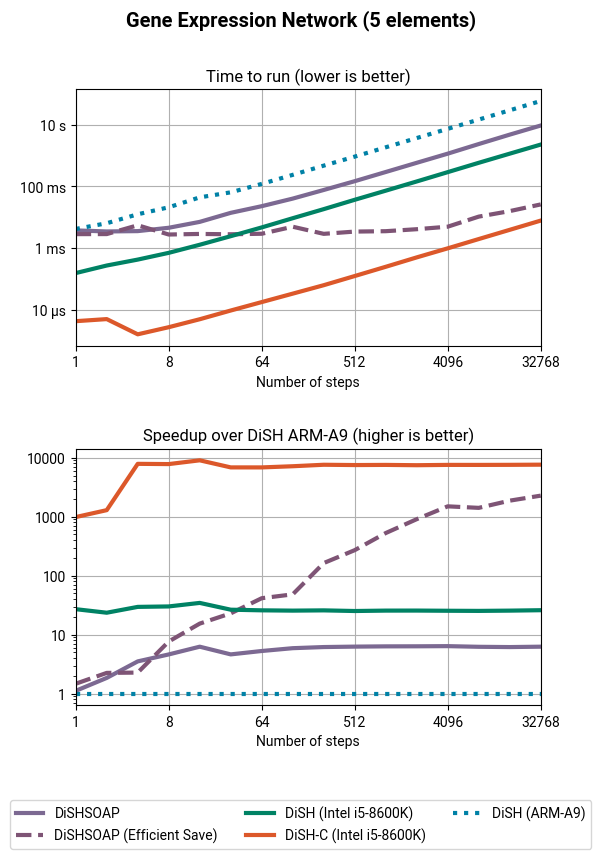

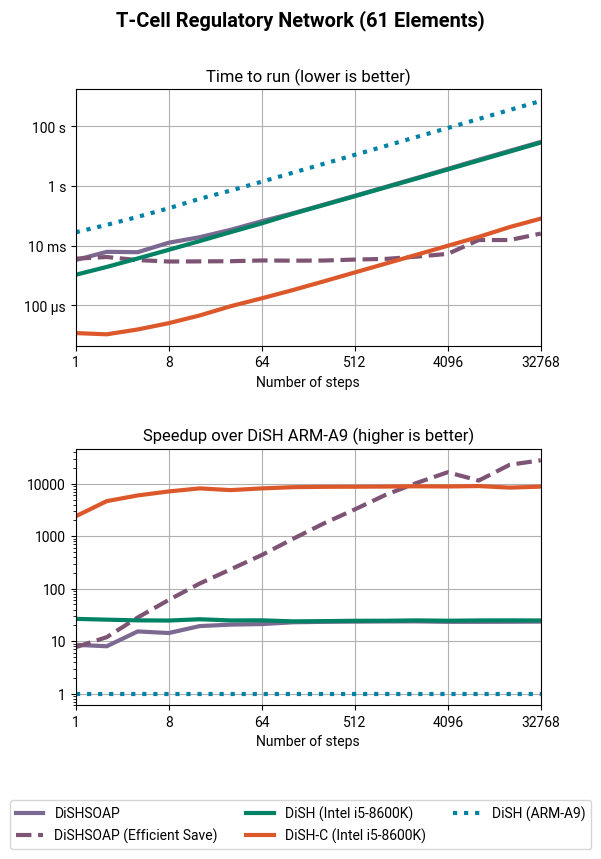

In [117]:
import matplotlib.ticker as ticker

waltstyle = {
    'lines.linewidth': 3,
    'font.family': 'Roboto',
    'axes.prop_cycle': 
        plt.cycler(
            color     = ['#7c6992', '#7e5475', '#008264', '#dc582a', '#0081a6',],
            linestyle = ['-',       '--',      '-',       '-',       ':',],
        ),
}

for source, name in zip(['gene-exp-summary.csv',
                         'tcell-summary.csv'],
                        ['Gene Expression Network (5 elements)',
                         'T-Cell Regulatory Network (61 Elements)']):
    
    df = pd.read_csv(source, sep=',', header=0, index_col=0)
    with plt.style.context(waltstyle):

        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6,8))
        ax1.loglog(df['fastdish_time'],         label='DiSHSOAP')
        ax1.loglog(df['fastdish_pickled_time'], label='DiSHSOAP (Efficient Save)')
        ax1.loglog(df['dish_intel_time'],       label='DiSH (Intel i5-8600K)')
        ax1.loglog(df['dishy_intel_time'],      label='DiSH-C (Intel i5-8600K)')
        ax1.loglog(df['dish_time'],             label='DiSH (ARM-A9)')

        ax1.set_title('Time to run (lower is better)')
        ax1.yaxis.set_major_formatter(ticker.EngFormatter(unit='s'))

        df['fastdish_norm']         = df['dish_time'] / df['fastdish_time']
        df['fastdish_pickled_norm'] = df['dish_time'] / df['fastdish_pickled_time']
        df['dish_intel_norm']       = df['dish_time'] / df['dish_intel_time']
        df['dishy_intel_norm']      = df['dish_time'] / df['dishy_intel_time']
        df['dish_norm']             = df['dish_time'] / df['dish_time']

        ax2.loglog(df['fastdish_norm'],         label='DiSHSOAP')
        ax2.loglog(df['fastdish_pickled_norm'], label='DiSHSOAP (Efficient Save)')
        ax2.loglog(df['dish_intel_norm'],       label='DiSH (Intel i5-8600K)')
        ax2.loglog(df['dishy_intel_norm'],      label='DiSH-C (Intel i5-8600K)')
        ax2.loglog(df['dish_norm'],             label='DiSH (ARM-A9)')

        ax2.set_title('Speedup over DiSH ARM-A9 (higher is better)')
        ax2.yaxis.set_major_formatter(ticker.ScalarFormatter())

        for ax in (ax1, ax2):
            ax.grid(which='major')
            ax.set_xlabel('Number of steps')
            ax.set_xticks([2**i for i in range(0,16,3)], minor=False)
            ax.set_xticks([], minor=True)
            ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
            ax.set_xlim(1,2**15)

        fig.legend(
            handles = [ax1.lines[i] for i in range(len(ax1.lines))],
            bbox_to_anchor = (0.5, 0.0), loc = 'upper center', # anchor is at bottom
            ncol=3
        )

        fig.subplots_adjust(hspace=0.4)
        fig.suptitle(name, fontsize='x-large', fontweight='semibold')

        plt.savefig(source[:-11] + 'plots.pdf', bbox_inches='tight')
        plt.show()

In [39]:
dir(plt)

['Annotation',
 'Arrow',
 'Artist',
 'AutoLocator',
 'Axes',
 'Button',
 'Circle',
 'Figure',
 'FigureCanvasBase',
 'FixedFormatter',
 'FixedLocator',
 'FormatStrFormatter',
 'Formatter',
 'FuncFormatter',
 'GridSpec',
 'IndexLocator',
 'Line2D',
 'LinearLocator',
 'Locator',
 'LogFormatter',
 'LogFormatterExponent',
 'LogFormatterMathtext',
 'LogLocator',
 'MaxNLocator',
 'MouseButton',
 'MultipleLocator',
 'Normalize',
 'NullFormatter',
 'NullLocator',
 'Number',
 'PolarAxes',
 'Polygon',
 'Rectangle',
 'ScalarFormatter',
 'Slider',
 'Subplot',
 'SubplotSpec',
 'Text',
 'TickHelper',
 'Widget',
 '_INSTALL_FIG_OBSERVER',
 '_IP_REGISTERED',
 '_IoffContext',
 '_IonContext',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_api',
 '_auto_draw_if_interactive',
 '_backend_mod',
 '_copy_docstring_and_deprecators',
 '_get_backend_mod',
 '_get_required_interactive_framework',
 '_interactive_bk',
 '_log',
 '_pylab_helpers',
 '_